In [ ]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [ ]:
df = pd.read_csv('/content/books.csv')

In [ ]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [ ]:
df.shape

(11127, 13)

In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
Unnamed: 12           object
dtype: object

In [ ]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [ ]:
df.describe(include = 'object')

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,publication_date,publisher,Unnamed: 12
count,11127,11127,11127,11127,11127,11127,11127,11127,11127,4
unique,10352,6643,212,11126,243,31,999,3682,2294,4
top,The Brothers Karamazov,Stephen King,4,3.58,9.78014E+12,eng,288,10/1/2005,Vintage,Harvard University Press
freq,9,40,219,2,662,8908,230,56,318,1


In [ ]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


# Feature Engineering

- Extract Important Features
- Reducing the size of Features
- Creating new features from the existring ones

In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df.isbn.nunique()

11126

In [ ]:
df.isbn13.nunique()

243

In [ ]:
df.drop(['bookID', 'isbn', 'isbn13'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'Unnamed: 12'],
      dtype='object')

In [ ]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11122    12/21/2004
11123     12/1/1988
11124      8/1/1993
11125     2/27/2007
11126     5/28/2006
Name: publication_date, Length: 11127, dtype: object

In [ ]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2] if len(x) >= 3 else None)


In [ ]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN,2004


In [ ]:
df.dtypes

title                 object
authors               object
average_rating        object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
Unnamed: 12           object
year                  object
dtype: object

In [ ]:
# Convert 'year' column to numeric, replacing non-convertible values with NaN
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Fill NaN values with a default value (e.g., -1)
df['year'] = df['year'].fillna(-1).astype(int)


In [ ]:
df.dtypes

title                 object
authors               object
average_rating        object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
Unnamed: 12           object
year                   int64
dtype: object

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'Unnamed: 12', 'year'],
      dtype='object')

In [ ]:
df['year'].min()

-1

In [ ]:
df['year'].max()

2020

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'Unnamed: 12', 'year'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

,title,authors,average_rating,language_code,publisher
9668,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [ ]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

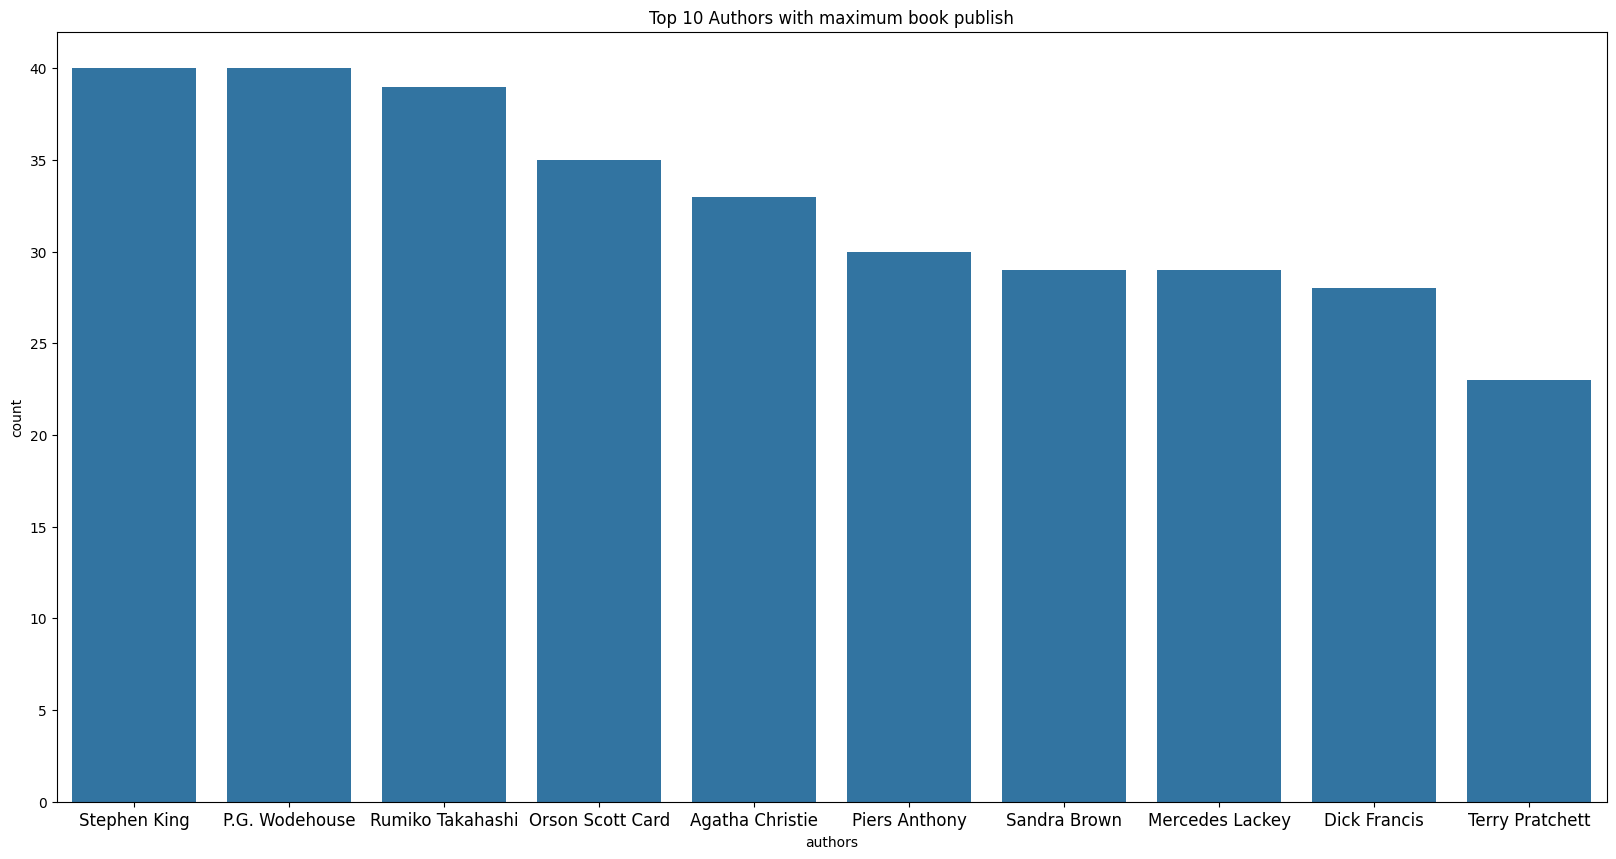

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'Unnamed: 12', 'year'],
      dtype='object')

In [ ]:
df.language_code.value_counts()

language_code
eng            8908
en-US          1408
spa             218
en-GB           214
fre             144
ger              99
jpn              46
mul              19
zho              14
grc              11
por              10
en-CA             7
ita               5
lat               3
enm               3
rus               2
swe               2
ara               1
wel               1
gla               1
tur               1
9.78085E+12       1
nor               1
9.78156E+12       1
glg               1
msa               1
nl                1
9.78159E+12       1
9.78067E+12       1
srp               1
ale               1
Name: count, dtype: int64

In [ ]:
# Convert numeric columns to numeric data types
numeric_cols = ['average_rating', 'ratings_count', 'text_reviews_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Group by 'language_code' and calculate the mean of numeric columns
result = df.groupby(['language_code'])[numeric_cols].mean()

# Apply background gradient
styled_result = result.style.background_gradient(cmap='Wistia')

styled_result



,average_rating,ratings_count,text_reviews_count
language_code,,,
9.78067E+12,3.100000,236.000000,61.000000
9.78085E+12,nan,49.000000,0.000000
9.78156E+12,nan,342.000000,38.000000
9.78159E+12,nan,400.000000,26.000000
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244


In [ ]:
book = df['title'].value_counts()[:20]
book

title
The Brothers Karamazov        9
The Iliad                     9
'Salem's Lot                  8
The Odyssey                   8
Gulliver's Travels            8
Anna Karenina                 8
A Midsummer Night's Dream     7
The Picture of Dorian Gray    7
The Secret Garden             6
Romeo and Juliet              6
Collected Stories             6
Robinson Crusoe               6
The Histories                 6
The Great Gatsby              6
The Scarlet Letter            6
Sense and Sensibility         6
Macbeth                       6
Jane Eyre                     6
Treasure Island               6
Dracula                       5
Name: count, dtype: int64

<ipython-input-36-dec237198d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


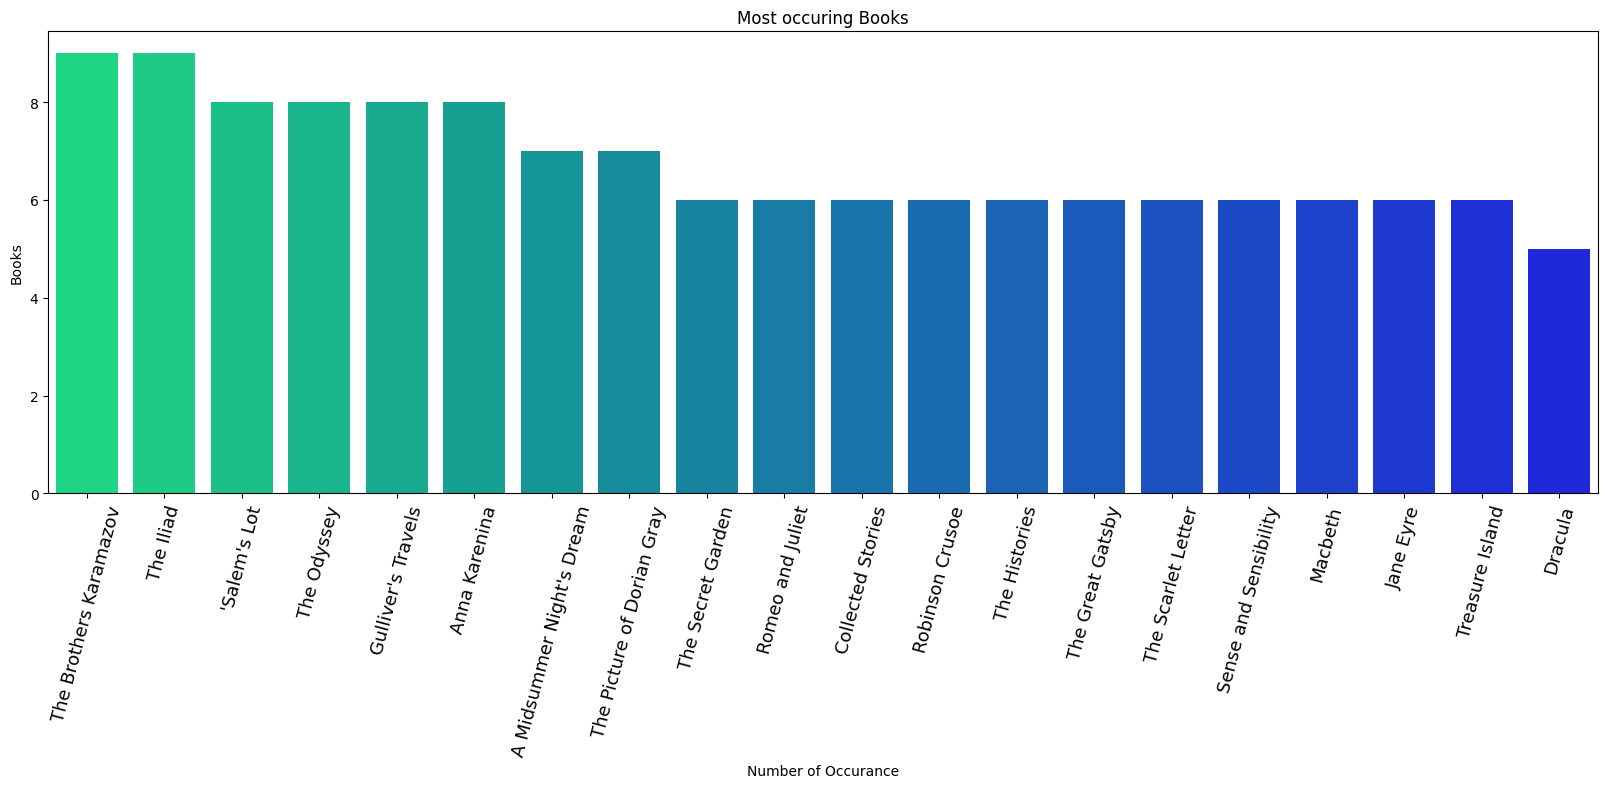

In [ ]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

<ipython-input-37-c7a8c5455b40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


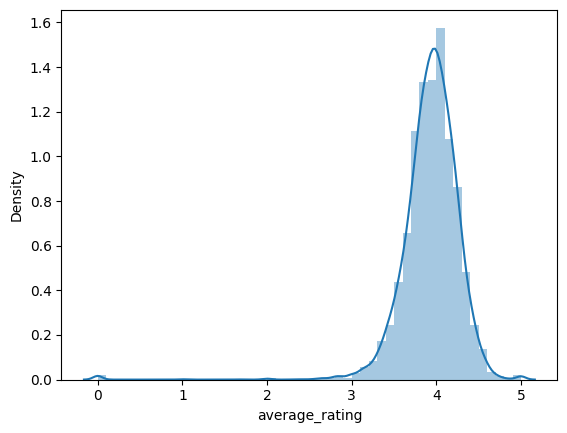

In [ ]:
sns.distplot(df['average_rating'])
plt.show()

In [ ]:
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4126,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4790,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4935,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5025,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5476,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5478,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


In [ ]:
publisher = df['publisher'].value_counts()[:20]
publisher

publisher
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: count, dtype: int64

<ipython-input-40-186e7592a35e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')


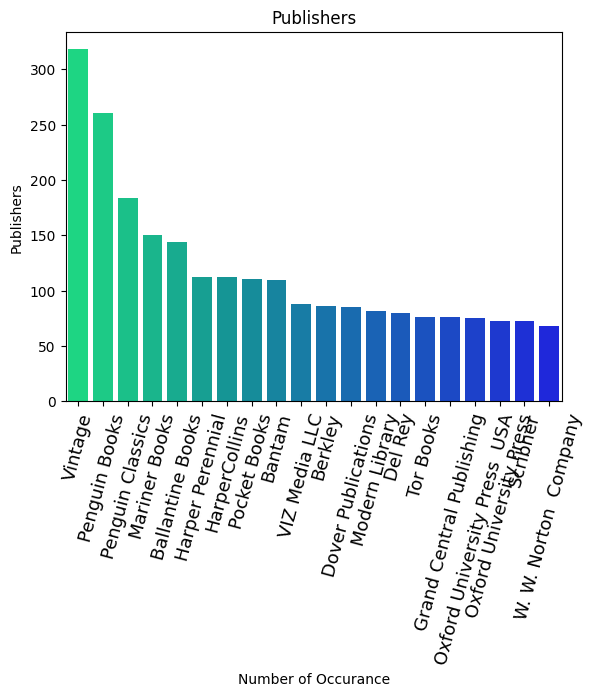

In [ ]:
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

# Recommending Books based on Publishers

In [ ]:
def recomd_books_publisheres(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

In [ ]:
recomd_books_publisheres('Vintage')

,title,average_rating
7374,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10842,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9630,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8790,Selected Stories,4.28
4020,Selected Stories,4.28


In [ ]:
recomd_books_publisheres('Penguin Books')

,title,average_rating
4245,The Complete Maus,4.55
5566,The Penguin Companion to European Literature,4.50
1381,Before The Mayflower A History of Black America,4.44
4603,Selected Non-Fictions,4.43
3011,The Read-Aloud Handbook,4.41
4552,Life With Jeeves (Jeeves #6 2 & 4),4.39
1275,East of Eden,4.37
3304,Ludwig Wittgenstein: The Duty of Genius,4.36
4982,Life at Blandings,4.35
10871,The Portable Dorothy Parker,4.34


In [ ]:
@interact
def recomd_books_publisher(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [ ]:
import pickle
# Save unique publisher names to a pickle file
with open("publisher_names.pkl", "wb") as f:
    pickle.dump(recomd_books_publisher, f)


# Recommending Books based on Language

In [ ]:
@interact
def recomd_books_lang(language = list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == language][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

In [ ]:
import pickle
# Save unique languages to a pickle file
with open("language.pkl", "wb") as f:
    pickle.dump(recomd_books_lang, f)

# Recommending Books Based on Authors

In [ ]:
@interact
def recomd_authors(author_name = list(df['authors'].value_counts().index)):
    a = df[df['authors'] == author_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='author_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko T…

In [ ]:
# Save unique Author to a pickle file
with open("author_names.pkl", "wb") as f:
    pickle.dump(recomd_books_lang, f)

# Data Preprocessing

In [ ]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN,2004


In [ ]:
def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [ ]:
df['rating_obj'].value_counts()

rating_obj
between 3 and 4    6286
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

In [ ]:
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [ ]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'Unnamed: 12', 'year', 'rating_obj'],
      dtype='object')

In [ ]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,9.78067E+12,9.78085E+12,9.78156E+12,9.78159E+12,ale,ara,en-CA,en-GB,en-US,eng,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
features = pd.concat([rating_df,language_df, df['average_rating'],
                    df['ratings_count'], df['title']], axis = 1)
features.set_index('title', inplace= True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,9.78067E+12,9.78085E+12,9.78156E+12,9.78159E+12,ale,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# Model Building

# KNN

In [ ]:
from sklearn import neighbors

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in features_scaled
features_imputed = imputer.fit_transform(features_scaled)

# Initialize NearestNeighbors model
model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')

# Fit the model with imputed data
model.fit(features_imputed)


NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [ ]:
df['title'].value_counts()

title
The Brothers Karamazov                                  9
The Iliad                                               9
'Salem's Lot                                            8
The Odyssey                                             8
Gulliver's Travels                                      8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: count, Length: 10352, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in features_scaled
features_imputed = imputer.fit_transform(features_scaled)

# Initialize NearestNeighbors model
model = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='euclidean')

# Fit the model with imputed data
model.fit(features_imputed)

# Compute distances and indices of nearest neighbors for all samples
distances, idlist = model.kneighbors(features_imputed)

# Now you have idlist containing indices of nearest neighbors for each sample

# Define the BookRecommender function
@interact
def BookRecommender(book_name=list(df['title'].value_counts().index)):
    book_list_name = []

    # Find book_id
    book_id = df[df['title'] == book_name].index
    if len(book_id) == 0:
        return "Book not found in the dataset"
    book_id = book_id[0]  # Take the first index if multiple books with the same name

    # Iterate through recommended book ids
    for newid in idlist[book_id]:
        book_list_name.append(df.iloc[newid]['title'])

    return book_list_name


interactive(children=(Dropdown(description='book_name', options=('The Brothers Karamazov', 'The Iliad', "'Sale…

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Initialize the KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='euclidean')

# Fit the model
knn.fit(features_imputed)

# Function to recommend books using KNN
def recommend_books_knn(book_name):
    book_list_name = []
    # Find book index
    book_index = df[df['title'] == book_name].index.tolist()
    if not book_index:
        return "Book not found in the dataset"
    book_index = book_index[0]

    # Finding indices of 5 nearest neighbors
    distances, indices = knn.kneighbors([features_imputed[book_index]])

    for i in indices[0]:
        book_list_name.append(df.iloc[i]['title'])

    # Exclude the input book if it's in the list
    book_list_name = [book for book in book_list_name if book != book_name]

    return book_list_name[:5]


#  KMeans

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


In [ ]:
# Read the dataset
df = pd.read_csv('/content/books (2).csv')
df.columns = df.columns.str.strip()

In [ ]:
# Feature Engineering
df['year'] = df['publication_date'].str.split('/').str[-1]
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].fillna(-1).astype(int)
df.drop(['bookID', 'isbn', 'isbn13'], axis=1, inplace=True)

In [ ]:
# Convert numeric columns to numeric data types
numeric_cols = ['average_rating', 'ratings_count', 'text_reviews_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Group by 'language_code' and calculate the mean of numeric columns
result = df.groupby(['language_code'])[numeric_cols].mean()

In [ ]:
# GUI for Book Recommendation using KMeans clustering
def recommend_books(book_name):
    book_list_name = []

    # Find book_id
    book_id = df[df['title'] == book_name].index
    if len(book_id) == 0:
        return "Book not found in the dataset"
    book_id = book_id[0]  # Take the first index if multiple books with the same name

    # Get the cluster label for the book
    book_cluster = cluster_labels[book_id]

    # Find books in the same cluster
    cluster_books = df[cluster_labels == book_cluster]

    # Exclude the selected book from recommendations
    cluster_books = cluster_books[cluster_books['title'] != book_name]

    # Select top 5 books from the cluster
    recommended_books = cluster_books['title'].head(5)

    return recommended_books.tolist()

In [ ]:
# Preprocessing for KMeans clustering
rating_df = pd.get_dummies(pd.cut(df['average_rating'], bins=[0, 1, 2, 3, 4, 5], labels=["0-1", "1-2", "2-3", "3-4", "4-5"]))
language_df = pd.get_dummies(df['language_code'])
features = pd.concat([rating_df, language_df, df[numeric_cols]], axis=1)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_scaled)

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(features_imputed)
print()

In [ ]:
# GUI for Book Recommendation
@interact
def book_recommender(book_name=list(df['title'].value_counts().index)):
    recommended_books = recommend_books(book_name)
    if isinstance(recommended_books, str):
        print(recommended_books)
    else:
        print("Books similar to '{}':".format(book_name))
        for i, book in enumerate(recommended_books, start=1):
            print("{}. {}".format(i, book))

interactive(children=(Dropdown(description='book_name', options=('The Brothers Karamazov', 'The Iliad', "'Sale…

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from ipywidgets import interact

# Read the dataset
df = pd.read_csv('/content/books (2).csv')
df.columns = df.columns.str.strip()

# Feature Engineering
df['year'] = df['publication_date'].str.split('/').str[-1]
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].fillna(-1).astype(int)
df.drop(['bookID', 'isbn', 'isbn13'], axis=1, inplace=True)

# Convert numeric columns to numeric data types
numeric_cols = ['average_rating', 'ratings_count', 'text_reviews_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Preprocessing for clustering
rating_df = pd.get_dummies(pd.cut(df['average_rating'], bins=[0, 1, 2, 3, 4, 5], labels=["0-1", "1-2", "2-3", "3-4", "4-5"]))
language_df = pd.get_dummies(df['language_code'])
features = pd.concat([rating_df, language_df, df[numeric_cols]], axis=1)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(features_imputed)

# Function to recommend books from the same cluster
def recommend_books(book_name):
    book_list_name = []

    # Find book_id
    book_id = df[df['title'] == book_name].index
    if len(book_id) == 0:
        return "Book not found in the dataset"
    book_id = book_id[0]  # Take the first index if multiple books with the same name

    # Get the cluster label for the book
    book_cluster = cluster_labels[book_id]

    # Find books in the same cluster
    cluster_books = df[cluster_labels == book_cluster]

    # Exclude the selected book from recommendations
    cluster_books = cluster_books[cluster_books['title'] != book_name]

    # Select top 5 books from the cluster
    recommended_books = cluster_books['title'].head(5)

    return recommended_books.tolist()

# Sample labeled data (replace with your actual labeled data)
# Assuming each book recommendation has a ground truth label (1 for relevant, 0 for irrelevant)
labeled_data = {'Book1': 1, 'Book2': 0, 'Book3': 1, 'Book4': 0, 'Book5': 1}

# Generate predictions for the labeled data
predictions = {}
for book, label in labeled_data.items():
    recommended_books = recommend_books(book)
    predicted_label = int(book in recommended_books)  # Predict 1 if book is recommended, 0 otherwise
    predictions[book] = predicted_label

# Extract ground truth labels and predicted labels
ground_truth_labels = list(labeled_data.values())
predicted_labels = [predictions[book] for book in labeled_data.keys()]

# Compute classification report
report = classification_report(ground_truth_labels, predicted_labels, target_names=['Irrelevant', 'Relevant'])

# Print the classification report
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.40      1.00      0.57         2
    Relevant       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions_knn = {}
for book, label in labeled_data.items():
    recommended_books_knn = recommend_books_knn(book)
    predicted_label = int(book in recommended_books_knn)  # Predict 1 if book is recommended, else 0
    predictions_knn[book] = predicted_label

# Now, predictions_knn holds the predicted relevance based on KNN recommendations

# Extract ground truth labels and predicted labels for KNN
predicted_labels_knn = [predictions_knn[book] for book in labeled_data.keys()]

# Compute classification report for KNN model
report_knn = classification_report(ground_truth_labels, predicted_labels_knn, target_names=['Irrelevant', 'Relevant'])

# Print the classification report for KNN
print("Classification Report for KNN:")
print(report_knn)


Classification Report for KNN:
              precision    recall  f1-score   support

  Irrelevant       0.40      1.00      0.57         2
    Relevant       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
